# What is Kernel Principal Component Analysis?

Principal Component Analysis (PCA) is a simple yet popular and useful linear transformation technique that is used in numerous applications, such as stock market predictions, the analysis of gene expression data, and many more.

kernel trick, a method to project original data into higher dimension without sacrificing too much computational time. (Non-linear feature mapping). And the matrix form to normalize the feature space.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(10, 10))
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset into a pandas dataframe
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


<h4>So Dependent Variable of the dataset is splitted into 3 classes namely(1, 2, 3)</h4>

In [5]:
df.shape

(400, 5)

In [6]:
X = df.iloc[:, [2, 3]].values
Y = df.iloc[:, 4].values

In [7]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [8]:
print("Size of X_train: {}".format(X_train.shape))
print("Size of X_test: {}".format(X_test.shape))
print("Size of Y_train: {}".format(Y_train.shape))
print("Size of Y_test: {}".format(Y_test.shape))

Size of X_train: (320, 2)
Size of X_test: (80, 2)
Size of Y_train: (320,)
Size of Y_test: (80,)


In [9]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Applying Kernel PCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [11]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
#Predicting The Results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [13]:
#Comparing the results
cm = confusion_matrix(Y_test, y_pred)
cm

array([[54,  4],
       [ 4, 18]], dtype=int64)

In [14]:
#Checking The Accuracy score
acc = accuracy_score(Y_test, y_pred)
print("The Accuracy on the model is: {}%".format((acc*100).astype('int32')))

The Accuracy on the model is: 90%


<h3>Building a text report showing the main classification metrics</h3>

In [15]:
cr = classification_report(Y_test, y_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.93      0.93      0.93        58
          1       0.82      0.82      0.82        22

avg / total       0.90      0.90      0.90        80



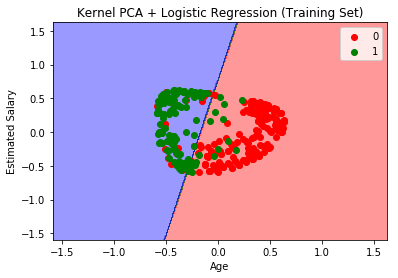

In [18]:
# Visualising the Training set results
x_set, y_set = X_train, Y_train

#Creating the grid of Minimum and maximun values from X_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
                               stop = x_set[:, 0].max() + 1,
                               step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1,
                              stop = x_set[:, 1].max() + 1,
                              step = 0.01))

#Plotting the line Classifier
plt.contourf(X1, 
             X2, 
             classifier.predict(np.array([X1.ravel(),
                                          X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.4,
            cmap = ListedColormap(('red', 'green', 'blue')))

#Plotting The Datapoint in red and gree color
for i,j in  enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], 
                x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), 
                label = j
               )
    
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title("Kernel PCA + Logistic Regression (Training Set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

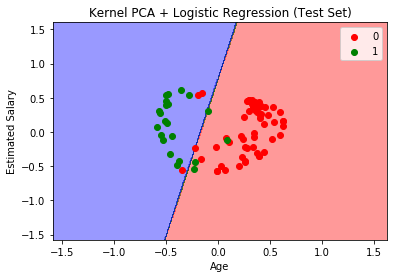

In [19]:
# Visualising the Test set results
x_set, y_set = X_test, Y_test

#Creating the grid of Minimum and maximun values from X_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
                               stop = x_set[:, 0].max() + 1,
                               step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1,
                              stop = x_set[:, 1].max() + 1,
                              step = 0.01))

#Plotting the line Classifier
plt.contourf(X1, 
             X2, 
             classifier.predict(np.array([X1.ravel(),
                                          X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.4,
            cmap = ListedColormap(('red', 'green', 'blue')))

#Plotting The Datapoint in red and gree color
for i,j in  enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], 
                x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), 
                label = j
               )
    
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title("Kernel PCA + Logistic Regression (Test Set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()